
# Project: UNIMIX Data Analyst Test 

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#Exploratory">Exploratory Data Analysis</a></li>
<li><a href="#Explanatory">Explanatory</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> I will analyze and explore dataset from UNIMIX records , this data icludes information about Transaction of ready mix concrete from UNIMIX company to thier clients. 
This data set contains information about 27108 operations, including 17 different variables like Plant Name, Project Name, project location, Order Quantity, Price, concrete strength ,Transaction Time	 and and other atrractive information to be explored .

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline
from scipy import stats
import datetime

<a id='wrangling'></a>
## Data Wrangling

In [2]:
import pandas as pd
from pandas import ExcelWriter
from pandas import ExcelFile
df = pd.read_excel('Data Analyst Test.xlsx',0)
df.head()

,Plant_Name,Work_Order_Number,Transaction_Number,Customer_Name,Project_Name,Project_Location,Order_Quantity,Cement_Type,Concrete_Price,Strength,Transaction_Time,Driver_Name,Pump_ID,Pump_Operator_Name,Truck_ID,Ticket_Quantity,Sales_Person
0,Ismailia,207.0,1339.0,إيهاب سعيد,NaN,مكتب الارشاد,17.250000,OPC,400.0,300,2010-01-01 04:32:02,ايمن السيد حميده محمد,207-42m,NaN,135,1,محمود بهجت
1,Ismailia,209.0,1354.0,إيهاب سعيد,NaN,نفيشة,17.416667,OPC,350.0,300,2010-01-01 06:56:02,محمد صلاح السيد محمود,216-43m,NaN,152,1,محمود بهجت
2,Ismailia,206.0,1335.0,إيهاب سعيد,NaN,القنطرة,17.166667,OPC,375.0,300,2010-01-01 09:20:02,محمد محمود محمد فؤاد,216-43m,محمد السيد عبد المتعال منتصر,120,1,محمود بهجت
3,Ismailia,242.0,1569.0,يحيى يوسف,NaN,الجامعة,20.166667,OPC,350.0,250,2010-01-01 11:44:02,حسين فتحى مصطفى محمد,مزراب,محمد السيد عبد المتعال منتصر,108,1,محمود بهجت
4,Ismailia,208.0,1352.0,محمد احمد,NaN,البهتيني,17.333333,OPC,400.0,300,2010-01-01 14:08:02,محمد السيد خليل خليل,216-43m,NaN,151,1,محمود بهجت


In [3]:
df.shape

(27108, 17)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27108 entries, 0 to 27107
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Plant_Name          27108 non-null  object        
 1   Work_Order_Number   27098 non-null  float64       
 2   Transaction_Number  27074 non-null  float64       
 3   Customer_Name       27078 non-null  object        
 4   Project_Name        6916 non-null   object        
 5   Project_Location    21800 non-null  object        
 6   Order_Quantity      27108 non-null  float64       
 7   Cement_Type         27078 non-null  object        
 8   Concrete_Price      27101 non-null  float64       
 9   Strength            26994 non-null  object        
 10  Transaction_Time    27108 non-null  datetime64[ns]
 11  Driver_Name         26912 non-null  object        
 12  Pump_ID             27108 non-null  object        
 13  Pump_Operator_Name  22038 non-null  object    

In [5]:
df[df['Work_Order_Number'].isnull()] 

,Plant_Name,Work_Order_Number,Transaction_Number,Customer_Name,Project_Name,Project_Location,Order_Quantity,Cement_Type,Concrete_Price,Strength,Transaction_Time,Driver_Name,Pump_ID,Pump_Operator_Name,Truck_ID,Ticket_Quantity,Sales_Person
15742,N Capital,NaN,NaN,م.محمد احمد,الانفاق,الانفاق,0.0,OPC,400.0,350,2014-04-24 09:20:01.998021,عاطف حسن محمد احمد,213-43m,عبده مصطفى عبد العزيز,102,9,عادل محمود محمد
15743,N Capital,NaN,NaN,م.محمد احمد,الانفاق,الانفاق,0.0,OPC,400.0,350,2014-04-24 11:44:01.998021,عاطف حسن محمد احمد,213-43m,عبده مصطفى عبد العزيز,102,9,عادل محمود محمد
25134,Ismailia,NaN,2354.0,محمد حسن,فندق الفرسان,فندق الفرسان,0.0,OPC,250.0,150,2016-11-18 14:08:01.996840,ايمن السيد حميده محمد,212-43m,هانى ثابت حماد معوض,135,8,اسلام احسان
25141,Ismailia,NaN,NaN,محمد حسن,فندق الفرسان,فندق الفرسان,0.0,OPC,410.0,350,2016-11-19 06:56:01.996839,فؤاد عبدالعزيز فؤاد,209-39m,احمد على احمد حسن شوشة,108,8,اسلام احسان
25543,Ismailia,NaN,2354.0,محمد حسن,فندق الفرسان,فندق الفرسان,0.0,OPC,250.0,150,2016-12-29 11:44:01.996789,ايمن السيد حميده محمد,212-43m,هانى ثابت حماد معوض,135,8,اسلام احسان
25550,Ismailia,NaN,NaN,محمد حسن,فندق الفرسان,فندق الفرسان,0.0,OPC,410.0,350,2016-12-30 04:32:01.996788,فؤاد عبدالعزيز فؤاد,209-39m,احمد على احمد حسن شوشة,108,8,اسلام احسان
27091,Sokhna,NaN,NaN,NaN,NaN,NaN,0.0,NaN,200.0,NaN,2017-06-02 06:56:01.996594,NaN,مزراب,NaN,NaN,8,NaN
27092,Sokhna,NaN,NaN,NaN,NaN,NaN,0.0,NaN,200.0,NaN,2017-06-02 09:20:01.996594,NaN,مزراب,NaN,NaN,8,NaN
27106,Sokhna,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,2017-06-03 18:56:01.996592,NaN,مزراب,NaN,NaN,8,NaN
27107,Sokhna,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,2017-06-03 21:20:01.996592,NaN,مزراب,NaN,NaN,1,NaN


In [6]:
df[df['Cement_Type'].isnull()] 

,Plant_Name,Work_Order_Number,Transaction_Number,Customer_Name,Project_Name,Project_Location,Order_Quantity,Cement_Type,Concrete_Price,Strength,Transaction_Time,Driver_Name,Pump_ID,Pump_Operator_Name,Truck_ID,Ticket_Quantity,Sales_Person
27078,Gardenia,231.0,NaN,NaN,NaN,NaN,19.250000,NaN,200.0,NaN,2017-05-31 23:44:01.996596,NaN,203-42m,NaN,NaN,0,NaN
27079,Gardenia,243.0,NaN,NaN,NaN,NaN,20.250000,NaN,200.0,NaN,2017-06-01 02:08:01.996596,NaN,215-42m,NaN,NaN,8,NaN
27080,Gardenia,251.0,NaN,NaN,NaN,NaN,20.916667,NaN,200.0,NaN,2017-06-01 04:32:01.996596,NaN,203-42m,NaN,NaN,8,NaN
27081,Gardenia,253.0,NaN,NaN,NaN,NaN,21.083333,NaN,200.0,NaN,2017-06-01 06:56:01.996595,NaN,213-43m,NaN,NaN,8,NaN
27082,Gardenia,253.0,NaN,NaN,NaN,NaN,21.083333,NaN,200.0,NaN,2017-06-01 09:20:01.996595,NaN,213-43m,NaN,NaN,8,NaN
27083,Gardenia,259.0,NaN,NaN,NaN,NaN,21.583333,NaN,200.0,NaN,2017-06-01 11:44:01.996595,NaN,203-42m,NaN,NaN,8,NaN
27084,Gardenia,259.0,NaN,NaN,NaN,NaN,21.583333,NaN,200.0,NaN,2017-06-01 14:08:01.996595,NaN,211-39m,NaN,NaN,8,NaN
27085,Gardenia,269.0,NaN,NaN,NaN,NaN,22.416667,NaN,200.0,NaN,2017-06-01 16:32:01.996595,NaN,211-39m,NaN,NaN,8,NaN
27086,Gardenia,275.0,NaN,NaN,NaN,NaN,22.916667,NaN,200.0,NaN,2017-06-01 18:56:01.996595,NaN,203-42m,NaN,NaN,8,NaN
27087,Gardenia,275.0,NaN,NaN,NaN,NaN,22.916667,NaN,200.0,NaN,2017-06-01 21:20:01.996595,NaN,203-42m,NaN,NaN,8,NaN


In [7]:
df[df['Transaction_Number'].isnull()] 

,Plant_Name,Work_Order_Number,Transaction_Number,Customer_Name,Project_Name,Project_Location,Order_Quantity,Cement_Type,Concrete_Price,Strength,Transaction_Time,Driver_Name,Pump_ID,Pump_Operator_Name,Truck_ID,Ticket_Quantity,Sales_Person
15742,N Capital,NaN,NaN,م.محمد احمد,الانفاق,الانفاق,0.000000,OPC,400.0,350,2014-04-24 09:20:01.998021,عاطف حسن محمد احمد,213-43m,عبده مصطفى عبد العزيز,102,9,عادل محمود محمد
15743,N Capital,NaN,NaN,م.محمد احمد,الانفاق,الانفاق,0.000000,OPC,400.0,350,2014-04-24 11:44:01.998021,عاطف حسن محمد احمد,213-43m,عبده مصطفى عبد العزيز,102,9,عادل محمود محمد
25141,Ismailia,NaN,NaN,محمد حسن,فندق الفرسان,فندق الفرسان,0.000000,OPC,410.0,350,2016-11-19 06:56:01.996839,فؤاد عبدالعزيز فؤاد,209-39m,احمد على احمد حسن شوشة,108,8,اسلام احسان
25550,Ismailia,NaN,NaN,محمد حسن,فندق الفرسان,فندق الفرسان,0.000000,OPC,410.0,350,2016-12-30 04:32:01.996788,فؤاد عبدالعزيز فؤاد,209-39m,احمد على احمد حسن شوشة,108,8,اسلام احسان
27078,Gardenia,231.0,NaN,NaN,NaN,NaN,19.250000,NaN,200.0,NaN,2017-05-31 23:44:01.996596,NaN,203-42m,NaN,NaN,0,NaN
27079,Gardenia,243.0,NaN,NaN,NaN,NaN,20.250000,NaN,200.0,NaN,2017-06-01 02:08:01.996596,NaN,215-42m,NaN,NaN,8,NaN
27080,Gardenia,251.0,NaN,NaN,NaN,NaN,20.916667,NaN,200.0,NaN,2017-06-01 04:32:01.996596,NaN,203-42m,NaN,NaN,8,NaN
27081,Gardenia,253.0,NaN,NaN,NaN,NaN,21.083333,NaN,200.0,NaN,2017-06-01 06:56:01.996595,NaN,213-43m,NaN,NaN,8,NaN
27082,Gardenia,253.0,NaN,NaN,NaN,NaN,21.083333,NaN,200.0,NaN,2017-06-01 09:20:01.996595,NaN,213-43m,NaN,NaN,8,NaN
27083,Gardenia,259.0,NaN,NaN,NaN,NaN,21.583333,NaN,200.0,NaN,2017-06-01 11:44:01.996595,NaN,203-42m,NaN,NaN,8,NaN


In [8]:
df[df['Concrete_Price'].isnull()] 

,Plant_Name,Work_Order_Number,Transaction_Number,Customer_Name,Project_Name,Project_Location,Order_Quantity,Cement_Type,Concrete_Price,Strength,Transaction_Time,Driver_Name,Pump_ID,Pump_Operator_Name,Truck_ID,Ticket_Quantity,Sales_Person
27101,Gardenia,275.0,NaN,NaN,NaN,NaN,22.916667,NaN,NaN,NaN,2017-06-03 06:56:01.996593,NaN,203-42m,NaN,NaN,8,NaN
27102,Gardenia,275.0,NaN,NaN,NaN,NaN,22.916667,NaN,NaN,NaN,2017-06-03 09:20:01.996593,NaN,203-42m,NaN,NaN,8,NaN
27103,Gardenia,277.0,NaN,NaN,NaN,NaN,23.083333,NaN,NaN,NaN,2017-06-03 11:44:01.996593,NaN,217-47m,NaN,NaN,8,NaN
27104,Gardenia,277.0,NaN,NaN,NaN,NaN,23.083333,NaN,NaN,NaN,2017-06-03 14:08:01.996592,NaN,203-42m,NaN,NaN,8,NaN
27105,Gardenia,279.0,NaN,NaN,NaN,NaN,23.250000,NaN,NaN,NaN,2017-06-03 16:32:01.996592,NaN,203-42m,NaN,NaN,8,NaN
27106,Sokhna,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,2017-06-03 18:56:01.996592,NaN,مزراب,NaN,NaN,8,NaN
27107,Sokhna,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,2017-06-03 21:20:01.996592,NaN,مزراب,NaN,NaN,1,NaN


In [9]:
df[df['Strength'].isnull()] 

,Plant_Name,Work_Order_Number,Transaction_Number,Customer_Name,Project_Name,Project_Location,Order_Quantity,Cement_Type,Concrete_Price,Strength,Transaction_Time,Driver_Name,Pump_ID,Pump_Operator_Name,Truck_ID,Ticket_Quantity,Sales_Person
4022,Gardenia,273.0,2559.0,عبد اللطيف محمد,التجمع الخامس,NaN,22.750000,OPC,500.0,NaN,2011-02-07 09:20:01.999495,عصام عبد النبى,215-42m,سيد حسين امين محمدين,104,4,تامر عبده
4023,Gardenia,273.0,2559.0,عبد اللطيف محمد,التجمع الخامس,NaN,22.750000,OPC,500.0,NaN,2011-02-07 11:44:01.999494,عصام عبد النبى,215-42m,سيد حسين امين محمدين,104,4,تامر عبده
11081,Gardenia,412.0,3954.0,عبد اللطيف محمد,التجمع الخامس,التجمع الخامس,34.333333,OPC,500.0,NaN,2013-01-13 06:56:01.998607,طاهر محمد,مضخه ثابته,NaN,128,9,محمودعبدالمنعم احمد
11082,Gardenia,412.0,3954.0,عبد اللطيف محمد,التجمع الخامس,التجمع الخامس,34.333333,OPC,500.0,NaN,2013-01-13 09:20:01.998607,طاهر محمد,مضخه ثابته,NaN,128,9,محمودعبدالمنعم احمد
15314,Gardenia,467.0,4344.0,احمد سعيد,دار الاشاره,دار الاشاره,38.916667,OPC,500.0,NaN,2014-03-12 14:08:01.998075,وليد ابراهيم عبد الحفيظ بدر,مزراب,NaN,119,9,محمودعبدالمنعم احمد
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27103,Gardenia,277.0,NaN,NaN,NaN,NaN,23.083333,NaN,NaN,NaN,2017-06-03 11:44:01.996593,NaN,217-47m,NaN,NaN,8,NaN
27104,Gardenia,277.0,NaN,NaN,NaN,NaN,23.083333,NaN,NaN,NaN,2017-06-03 14:08:01.996592,NaN,203-42m,NaN,NaN,8,NaN
27105,Gardenia,279.0,NaN,NaN,NaN,NaN,23.250000,NaN,NaN,NaN,2017-06-03 16:32:01.996592,NaN,203-42m,NaN,NaN,8,NaN
27106,Sokhna,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,2017-06-03 18:56:01.996592,NaN,مزراب,NaN,NaN,8,NaN


In [10]:
df.Cement_Type.value_counts(ascending = True).head(10)

C200/N/OPC          4
C400/N/OPC          4
C350/N/OPC          4
C300/N/OPC         20
c350/n/opc         22
C250/350/OPC      118
SRC               214
TYPE II           470
CEM IIIA         2166
OPC             24056
Name: Cement_Type, dtype: int64

In [11]:
df.Concrete_Price.value_counts(ascending = True).head(10)

395.0      2
10.0       4
150.0      4
235.0     26
470.0     32
500.0     34
265.0     42
360.0     66
325.0     98
430.0    120
Name: Concrete_Price, dtype: int64

In [12]:
df.Concrete_Price.mean()

356.9370133943397

In [13]:
df.describe()

,Work_Order_Number,Transaction_Number,Order_Quantity,Concrete_Price,Ticket_Quantity
count,27098.000000,27074.000000,27108.000000,27101.000000,27108.000000
mean,283.318990,2350.223757,23.601206,356.937013,6.629482
std,156.043495,1199.056385,13.009129,51.653112,2.843676
min,33.000000,289.000000,0.000000,10.000000,0.000000
25%,172.000000,1399.000000,14.333333,350.000000,4.000000
50%,260.000000,2214.000000,21.583333,350.000000,8.000000
75%,389.000000,3130.000000,32.333333,400.000000,9.000000
max,688.000000,4962.000000,57.333333,500.000000,9.000000


In [14]:
df.Concrete_Price.sort_values(ascending = True).head(10)

16513     10.0
16505     10.0
16512     10.0
16504     10.0
15669    150.0
15450    150.0
24       150.0
39       150.0
26909    200.0
26910    200.0
Name: Concrete_Price, dtype: float64

### i will keep price = 10 because it is related to company financial policy.

In [15]:
df.Pump_Operator_Name.value_counts(ascending = True).head(10)

محمود محمد رزق جاد                                                              2
عبد الفتاح احمد هاشم                                                            2
عمرو محمد محمود محمد على                                                        2
                                                                                2
عبادة محمود                                                                     6
محمد بكير                                                                       8
محمد عشرى سيد                                                                  12
محمود جلال عاصي                                                                12
سيد حسين امين محمدين                                                           14
مصطفى عبد الفتاح                                                               16
Name: Pump_Operator_Name, dtype: int64

In [16]:
df.Sales_Person.value_counts(ascending = True).head(10)

محمد هشام                  2
محمود عبد المنعم احمد     42
مدير                      76
محمد فنحى                202
محمد سعيد                294
حسن رمضان                506
محمودعبدالمنعم احمد      804
  عادل محمود محمد        956
عبد المحسن صبرى          960
عماد احمد حسن            962
Name: Sales_Person, dtype: int64

In [17]:
df.duplicated().sum()

0

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27108 entries, 0 to 27107
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Plant_Name          27108 non-null  object        
 1   Work_Order_Number   27098 non-null  float64       
 2   Transaction_Number  27074 non-null  float64       
 3   Customer_Name       27078 non-null  object        
 4   Project_Name        6916 non-null   object        
 5   Project_Location    21800 non-null  object        
 6   Order_Quantity      27108 non-null  float64       
 7   Cement_Type         27078 non-null  object        
 8   Concrete_Price      27101 non-null  float64       
 9   Strength            26994 non-null  object        
 10  Transaction_Time    27108 non-null  datetime64[ns]
 11  Driver_Name         26912 non-null  object        
 12  Pump_ID             27108 non-null  object        
 13  Pump_Operator_Name  22038 non-null  object    

### Data Cleaning

### To be cleaned
- drop operations with NAN values for Work_Order_Number, Customer_Name, Strength, and Cement_Type.
- Work_Order_Number to object.
- Transaction_Number to object.
- Cement_Type to category.
- Strength to category.
- Pump_ID to object.
- Truck_ID to object.

In [19]:
df_clean = df.copy()

In [20]:
df_clean = df_clean.dropna(subset=['Work_Order_Number', 'Customer_Name','Cement_Type','Strength'])

In [21]:
df_clean.Work_Order_Number = df_clean.Work_Order_Number.astype('str').replace('\.0', '', regex=True)
df_clean.Transaction_Number = df_clean.Transaction_Number.astype('str').replace('\.0', '', regex=True)
df_clean.Pump_ID = df_clean.Pump_ID.astype('str')
df_clean.Pump_ID = df_clean.Pump_ID.astype('str')
df_clean.Cement_Type = df_clean.Cement_Type.astype('category')
df_clean.Strength = df_clean.Strength.astype('category')

In [22]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26988 entries, 0 to 27077
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Plant_Name          26988 non-null  object        
 1   Work_Order_Number   26988 non-null  object        
 2   Transaction_Number  26988 non-null  object        
 3   Customer_Name       26988 non-null  object        
 4   Project_Name        6860 non-null   object        
 5   Project_Location    21738 non-null  object        
 6   Order_Quantity      26988 non-null  float64       
 7   Cement_Type         26988 non-null  category      
 8   Concrete_Price      26988 non-null  float64       
 9   Strength            26988 non-null  category      
 10  Transaction_Time    26988 non-null  datetime64[ns]
 11  Driver_Name         26822 non-null  object        
 12  Pump_ID             26988 non-null  object        
 13  Pump_Operator_Name  21980 non-null  object    

In [23]:
df_clean.describe()

,Order_Quantity,Concrete_Price,Ticket_Quantity
count,26988.000000,26988.000000,26988.000000
mean,23.566462,357.178376,6.624537
std,13.001471,51.032538,2.847558
min,2.750000,10.000000,1.000000
25%,14.333333,350.000000,4.000000
50%,21.583333,350.000000,8.000000
75%,32.333333,400.000000,9.000000
max,57.333333,500.000000,9.000000


<a id='Exploratory'></a>
## Exploratory Data Analysis

In [24]:
df_clean.head()

,Plant_Name,Work_Order_Number,Transaction_Number,Customer_Name,Project_Name,Project_Location,Order_Quantity,Cement_Type,Concrete_Price,Strength,Transaction_Time,Driver_Name,Pump_ID,Pump_Operator_Name,Truck_ID,Ticket_Quantity,Sales_Person
0,Ismailia,207,1339,إيهاب سعيد,NaN,مكتب الارشاد,17.250000,OPC,400.0,300,2010-01-01 04:32:02,ايمن السيد حميده محمد,207-42m,NaN,135,1,محمود بهجت
1,Ismailia,209,1354,إيهاب سعيد,NaN,نفيشة,17.416667,OPC,350.0,300,2010-01-01 06:56:02,محمد صلاح السيد محمود,216-43m,NaN,152,1,محمود بهجت
2,Ismailia,206,1335,إيهاب سعيد,NaN,القنطرة,17.166667,OPC,375.0,300,2010-01-01 09:20:02,محمد محمود محمد فؤاد,216-43m,محمد السيد عبد المتعال منتصر,120,1,محمود بهجت
3,Ismailia,242,1569,يحيى يوسف,NaN,الجامعة,20.166667,OPC,350.0,250,2010-01-01 11:44:02,حسين فتحى مصطفى محمد,مزراب,محمد السيد عبد المتعال منتصر,108,1,محمود بهجت
4,Ismailia,208,1352,محمد احمد,NaN,البهتيني,17.333333,OPC,400.0,300,2010-01-01 14:08:02,محمد السيد خليل خليل,216-43m,NaN,151,1,محمود بهجت


In [25]:
df_to_plot = df_clean.copy()
df_to_plot['Day'] = df_clean['Transaction_Time'].dt.day_name()
df_to_plot['Month'] = df_clean['Transaction_Time'].dt.month_name()
df_to_plot['hour'] = (df_clean['Transaction_Time'].dt.hour) / 1.0
df_to_plot.hour = df_to_plot.hour.astype('str').replace('\.0', '.00', regex=True)
df_to_plot['Year'] = (df_clean['Transaction_Time'].dt.year) / 1.0
df_to_plot.Year = df_to_plot.Year.astype('int')

df_to_plot.head()

,Plant_Name,Work_Order_Number,Transaction_Number,Customer_Name,Project_Name,Project_Location,Order_Quantity,Cement_Type,Concrete_Price,Strength,...,Driver_Name,Pump_ID,Pump_Operator_Name,Truck_ID,Ticket_Quantity,Sales_Person,Day,Month,hour,Year
0,Ismailia,207,1339,إيهاب سعيد,NaN,مكتب الارشاد,17.250000,OPC,400.0,300,...,ايمن السيد حميده محمد,207-42m,NaN,135,1,محمود بهجت,Friday,January,4.00,2010
1,Ismailia,209,1354,إيهاب سعيد,NaN,نفيشة,17.416667,OPC,350.0,300,...,محمد صلاح السيد محمود,216-43m,NaN,152,1,محمود بهجت,Friday,January,6.00,2010
2,Ismailia,206,1335,إيهاب سعيد,NaN,القنطرة,17.166667,OPC,375.0,300,...,محمد محمود محمد فؤاد,216-43m,محمد السيد عبد المتعال منتصر,120,1,محمود بهجت,Friday,January,9.00,2010
3,Ismailia,242,1569,يحيى يوسف,NaN,الجامعة,20.166667,OPC,350.0,250,...,حسين فتحى مصطفى محمد,مزراب,محمد السيد عبد المتعال منتصر,108,1,محمود بهجت,Friday,January,11.00,2010
4,Ismailia,208,1352,محمد احمد,NaN,البهتيني,17.333333,OPC,400.0,300,...,محمد السيد خليل خليل,216-43m,NaN,151,1,محمود بهجت,Friday,January,14.00,2010


### Research Question 1 (what is the plant with th most transactions ?)

In [27]:
most_price = df_to_plot.groupby('Plant_Name').Concrete_Price.mean().sort_values(ascending= False).head(20)
most_price

Plant_Name
Assuit         397.414062
N Capital      377.030000
أكتوبر   2     367.722298
Sokhna         361.923523
Zeweil         360.893452
Ismailia       351.177242
Mokattam       350.831919
أكتوبر   1     350.020194
Gardenia       347.691350
October _ 3    334.832402
Name: Concrete_Price, dtype: float64

In [29]:
most_plant = df_to_plot.groupby('Plant_Name').Plant_Name.count().sort_values(ascending= False).head(20)
most_plant

Plant_Name
Mokattam       4712
Ismailia       3814
October _ 3    3222
Gardenia       3214
Assuit         2560
أكتوبر   1     2476
N Capital      2000
Zeweil         1802
Sokhna         1726
أكتوبر   2     1462
Name: Plant_Name, dtype: int64

### Research Question 2 (what is the customer with th most transactions ?)

In [30]:
most_customer = df_to_plot.groupby('Customer_Name').Customer_Name.count().sort_values(ascending= False).head(10)
most_customer

Customer_Name
احمد سعيد          4462
سعيد الشرقاوى      3816
سيد فرحات          2428
حسام حسن           2136
م.محمد احمد        2040
أمين شديد          1930
محمد حسن           1886
محمد احمد          1746
عبد اللطيف محمد    1510
أحمد السيد         1248
Name: Customer_Name, dtype: int64

In [31]:
less_customer = df_to_plot.groupby('Customer_Name').Customer_Name.count().sort_values(ascending= True).head(10)
less_customer

Customer_Name
مصطفي سمير              1
يوني ميكس               2
يونى مكس                2
عصام رجحان              2
يونى ميكس               2
احمد محمد عبد الستار    2
عادل خلاف               2
فتحي مبارك حسن          6
احمد محمد مصطفى         6
سيد رمضان               8
Name: Customer_Name, dtype: int64

### Research Question 3 (what is the order quantity range with most transactions ? )

In [32]:
most_quantity = df_to_plot.groupby('Order_Quantity').Concrete_Price.count().sort_values(ascending= False).head(10)
most_quantity

Order_Quantity
7.666667     410
17.583333    364
25.333333    352
6.000000     338
31.666667    328
20.666667    278
16.416667    244
7.000000     230
18.000000    222
7.083333     220
Name: Concrete_Price, dtype: int64

### Research Question 4 (what is the Price range with most transactions ? )

In [33]:
most_price = df_to_plot.groupby('Concrete_Price').Concrete_Price.count().sort_values(ascending= False).head(10)
most_price

Concrete_Price
350.0    9768
400.0    3878
420.0    2550
250.0    1700
330.0    1540
380.0    1332
300.0    1034
425.0     748
320.0     710
375.0     614
Name: Concrete_Price, dtype: int64

### Research Question 5 (the relation between order quantity and price)

In [34]:
relation1 = df_to_plot.groupby('Order_Quantity').Concrete_Price.mean().sort_values(ascending= False).head(10)
relation1

Order_Quantity
44.833333    462.50000
50.666667    450.00000
54.000000    450.00000
46.333333    450.00000
56.166667    450.00000
46.500000    450.00000
52.083333    450.00000
7.750000     430.47619
48.833333    430.00000
49.250000    430.00000
Name: Concrete_Price, dtype: float64

### Research Question 6 (what is the cement type with most transactions ?)

In [35]:
most_cement = df_to_plot.groupby('Cement_Type').Plant_Name.count().sort_values(ascending= False).head(20)
most_cement

Cement_Type
OPC             23998
CEM IIIA         2140
TYPE II           470
SRC               208
C250/350/OPC      118
c350/n/opc         22
C300/N/OPC         20
C200/N/OPC          4
C350/N/OPC          4
C400/N/OPC          4
Name: Plant_Name, dtype: int64

### Research Question 7 (what is the Strength type with most transactions ?)

In [36]:
most_strength = df_to_plot.groupby('Strength').Plant_Name.count().sort_values(ascending= False).head(10)
most_strength

Strength
250        9946
350        4776
300        4354
320        1808
200        1396
C30/375    1326
400         706
150         702
180         398
275         298
Name: Plant_Name, dtype: int64

### Research Question 8 (what is pump with most transactions ?)

In [37]:
most_pump = df_to_plot.groupby('Pump_ID').Plant_Name.count().sort_values(ascending= False).head(10)
most_pump

Pump_ID
مزراب      5130
215-42m    2604
213-43m    1804
218-42m    1694
208-52m    1472
212-43m    1434
216-43m    1364
217-47m    1360
206-42m    1324
209-39m    1184
Name: Plant_Name, dtype: int64

### Research Question 9 (what is Truck with most transactions ?)

In [38]:
most_Truck = df_to_plot.groupby('Truck_ID').Plant_Name.count().sort_values(ascending= False).head(10)
most_Truck

Truck_ID
خلاطة عميل    1914
131            710
146            682
118            600
303            520
173            496
153            452
151            442
174            442
166            436
Name: Plant_Name, dtype: int64

### Research Question 10 (who is sales person with most transactions ?)

In [39]:
most_sales_person = df_to_plot.groupby('Sales_Person').Plant_Name.count().sort_values(ascending= False).head(10)
most_sales_person

Sales_Person
علي ابراهيم                2518
معتز خلف الله فهمى         2256
ابراهيم كمال عبد العزيز    2252
محمود بهجت                 2170
خالد احمد                  1660
اسلام احسان                1644
محمد العايدي               1578
تامر عبده                  1478
طه عبدالمنعم               1468
M.hadad                    1460
Name: Plant_Name, dtype: int64

### Research Question 11 (In which hour of day is the most transactions occur ?)

In [40]:
most_hour = df_to_plot.groupby('hour').Plant_Name.count().sort_values(ascending= False)
most_hour

hour
21.00    2703
18.00    2701
23.00    2701
2.00     2700
16.00    2699
4.00     2699
6.00     2698
9.00     2697
14.00    2696
11.00    2694
Name: Plant_Name, dtype: int64

### Research Question 12 (In which day is the most transactions occur ?)

In [41]:
most_day = df_to_plot.groupby('Day').Plant_Name.count().sort_values(ascending= False).head(10)
most_day

Day
Saturday     3866
Sunday       3864
Wednesday    3860
Tuesday      3855
Friday       3850
Monday       3849
Thursday     3844
Name: Plant_Name, dtype: int64

### Research Question 13 (In which Month is the most transactions occur ?)

In [42]:
most_Month = df_to_plot.groupby('Month').Plant_Name.count().sort_values(ascending= False).head(10)
most_Month

Month
January     2475
March       2458
May         2453
April       2396
February    2258
August      2169
July        2169
October     2168
December    2166
November    2096
Name: Plant_Name, dtype: int64

### Research Question 14 (the transactions growth over years  ?)

In [43]:
most_year = df_to_plot.groupby('Year').Plant_Name.count().sort_values(ascending= False)
most_year

Year
2012    3660
2016    3656
2010    3649
2011    3648
2013    3648
2014    3632
2015    3630
2017    1465
Name: Plant_Name, dtype: int64

### Research Question 15 (the Relation between order quantity, strenght, and price  ?)

In [44]:
relation2 = df_to_plot.groupby(['Cement_Type','Strength']).Concrete_Price.mean().sort_values(ascending= False).head(10)
relation2

Cement_Type  Strength
CEM IIIA     300         450.000000
             320         420.000000
OPC          350         416.666667
c350/n/opc   350         410.000000
SRC          300         400.000000
OPC          350         396.587368
             400         390.683761
TYPE II      280         390.000000
OPC          C30/375     380.000000
             300         375.028986
Name: Concrete_Price, dtype: float64

In [45]:
df_to_plot.head()

,Plant_Name,Work_Order_Number,Transaction_Number,Customer_Name,Project_Name,Project_Location,Order_Quantity,Cement_Type,Concrete_Price,Strength,...,Driver_Name,Pump_ID,Pump_Operator_Name,Truck_ID,Ticket_Quantity,Sales_Person,Day,Month,hour,Year
0,Ismailia,207,1339,إيهاب سعيد,NaN,مكتب الارشاد,17.250000,OPC,400.0,300,...,ايمن السيد حميده محمد,207-42m,NaN,135,1,محمود بهجت,Friday,January,4.00,2010
1,Ismailia,209,1354,إيهاب سعيد,NaN,نفيشة,17.416667,OPC,350.0,300,...,محمد صلاح السيد محمود,216-43m,NaN,152,1,محمود بهجت,Friday,January,6.00,2010
2,Ismailia,206,1335,إيهاب سعيد,NaN,القنطرة,17.166667,OPC,375.0,300,...,محمد محمود محمد فؤاد,216-43m,محمد السيد عبد المتعال منتصر,120,1,محمود بهجت,Friday,January,9.00,2010
3,Ismailia,242,1569,يحيى يوسف,NaN,الجامعة,20.166667,OPC,350.0,250,...,حسين فتحى مصطفى محمد,مزراب,محمد السيد عبد المتعال منتصر,108,1,محمود بهجت,Friday,January,11.00,2010
4,Ismailia,208,1352,محمد احمد,NaN,البهتيني,17.333333,OPC,400.0,300,...,محمد السيد خليل خليل,216-43m,NaN,151,1,محمود بهجت,Friday,January,14.00,2010


<a id='Explanatory'></a>
## Explanatory

### Findining and recommendation 1 : Mokattam is most plant in transcations so i recommend to increase workers and equipements there in cover the need.

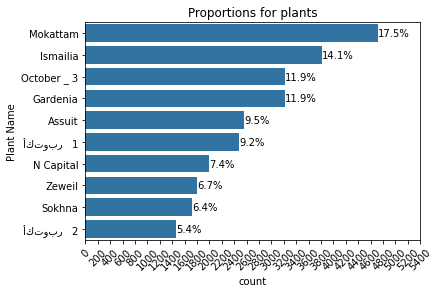

In [46]:
base_color = sb.color_palette()[0]
plant_order = most_plant.index
n_trans = df_to_plot['Plant_Name'].value_counts().sum()
max_plant = most_plant.iloc[0]
max_prop = max_plant / n_trans
tick_props = np.arange(0, max_prop, 0.02)
tick_names = ['{:0.2f}'.format(v) for v in tick_props]
sb.countplot(data=df_to_plot, y='Plant_Name', color=base_color, order=plant_order);
for i in range (most_plant.shape[0]):
    count = most_plant.iloc[i]
    pct_string = '{:0.1f}%'.format(100*count/n_trans)
    plt.text(count+1, i, pct_string, va='center')
    
ticks = np.arange(0,5500,200)
labels = ['{}'.format(v) for v in ticks]    
plt.xticks(ticks, labels,rotation=45);
plt.ylabel('Plant Name');
plt.title('Proportions for plants');

from matplotlib import rcParams

### Findining and recommendation 2 : Assuit is the most plant in price average and N_Capital has a huge gap in price so recommend to make studies to know the reason of price gap of N_Capital .

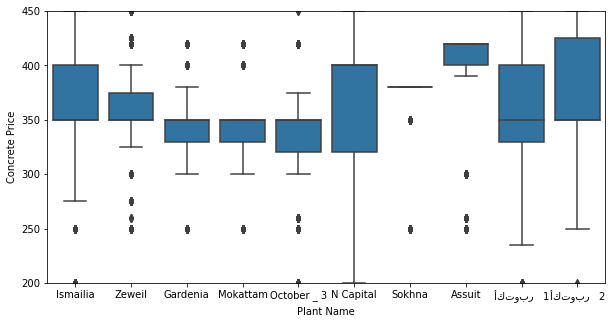

In [47]:
plt.figure(figsize = [10, 5])
base_color = sb.color_palette()[0]
sb.boxplot(data=df_to_plot, x='Plant_Name', y='Concrete_Price', color=base_color)
plt.ylim(200,450);
plt.ylabel('Concrete Price');    
plt.xlabel('Plant Name'); 

### Findining and recommendation 3 : Here they are the top 10 customers with UNIMIX so i recommend make for them special offers.

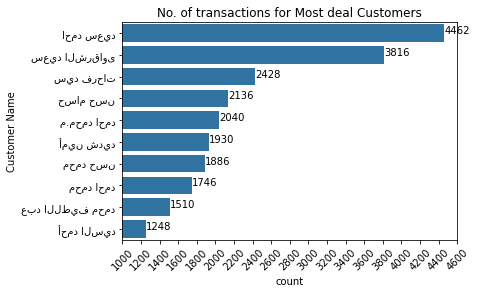

In [48]:
base_color = sb.color_palette()[0]

m_order = most_customer.index
ax = sb.countplot(data=df_to_plot, y='Customer_Name', color=base_color, order=m_order);

for index, value in enumerate(most_customer):
    plt.text(value, index,
             str(value))
            
ticks = np.arange(1000,4800,200)
labels = ['{}'.format(v) for v in ticks]    
plt.xticks(ticks, labels,rotation=45);
plt.ylabel('Customer Name');    
plt.xlim((1000,4600));
plt.title('No. of transactions for Most deal Customers');

from matplotlib import rcParams
rcParams['figure.figsize'] = 15,8

### Findining and recommendation 4 : Here they are the less 10 customers have deals with UNIMIX so i recommend to Know their feedback about our service and try to return the relationship again 
 .

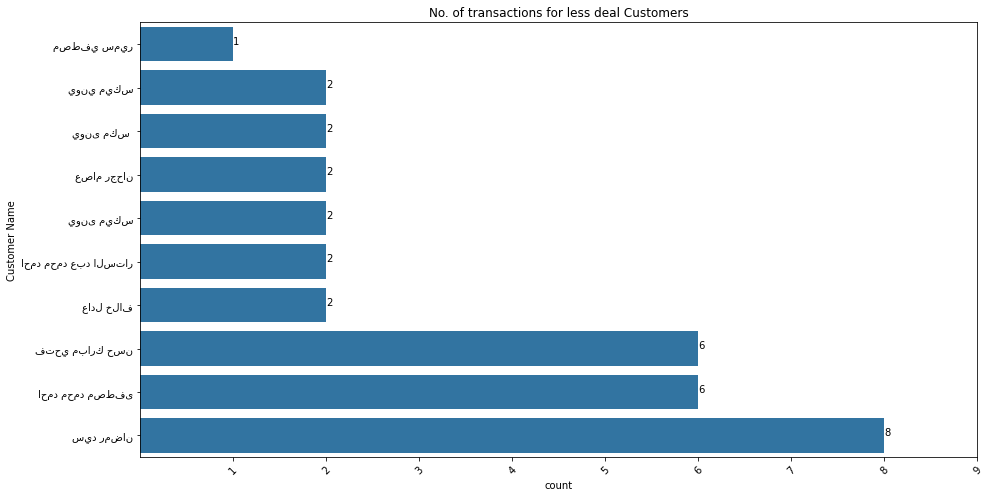

In [49]:
base_color = sb.color_palette()[0]

m_order = less_customer.index
ax = sb.countplot(data=df_to_plot, y='Customer_Name', color=base_color, order=m_order);

for index, value in enumerate(less_customer):
    plt.text(value, index,
             str(value))
            
ticks = np.arange(1,10,1)
labels = ['{}'.format(v) for v in ticks]    
plt.xticks(ticks, labels,rotation=45);
plt.ylabel('Customer Name');    
plt.xlim((0,9));
plt.title('No. of transactions for less deal Customers');

from matplotlib import rcParams
rcParams['figure.figsize'] = 15,8

### Findining and recommendation 5 : Order Quantity from 7 : 8 has the most transcations.

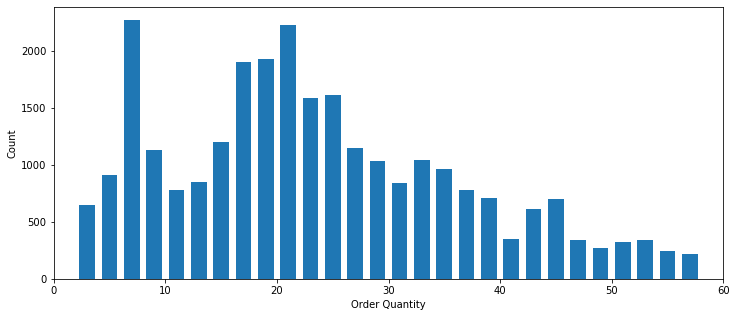

In [50]:
plt.figure(figsize = [12, 5]) 

bins = np.arange(0, df_to_plot['Order_Quantity'].max()+2, 2)
plt.hist(data = df_to_plot, x = 'Order_Quantity', bins = bins , rwidth = 0.7);
plt.xlabel('Order Quantity');
plt.ylabel('Count');
plt.xlim((0,60));

### Findining and recommendation 6 : Most Transcation have done with Price of 350 so i encourage to make deals around this price

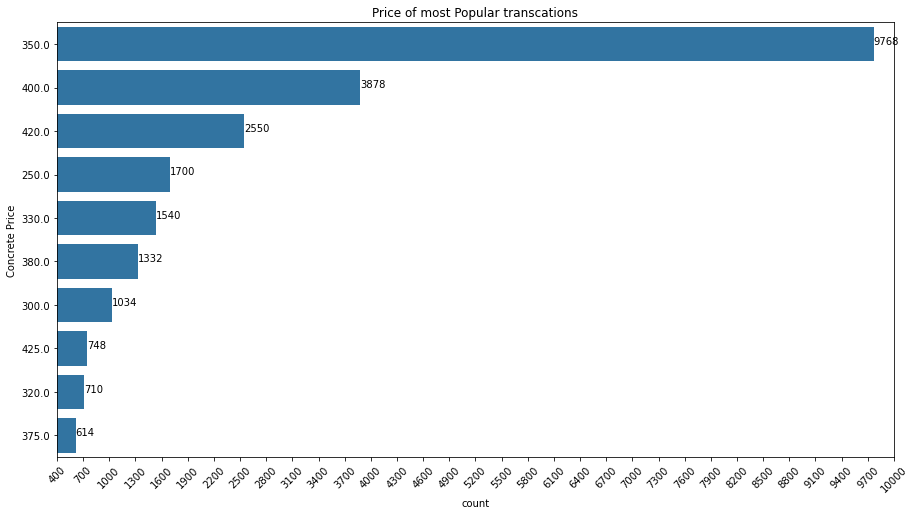

In [51]:
base_color = sb.color_palette()[0]

m_order1 = most_price.index
ax = sb.countplot(data=df_to_plot, y='Concrete_Price', color=base_color, order=m_order1);

for index, value in enumerate(most_price):
    plt.text(value, index,
             str(value))
            
ticks = np.arange(400,12000,300)
labels = ['{}'.format(v) for v in ticks]    
plt.xticks(ticks, labels,rotation=45);
plt.ylabel('Concrete Price');    
plt.xlim((400,10000));
plt.title('Price of most Popular transcations');

from matplotlib import rcParams
rcParams['figure.figsize'] = 15,8

### Findining and recommendation 7 : Concrete price from 300 to 350 have most order quantity .

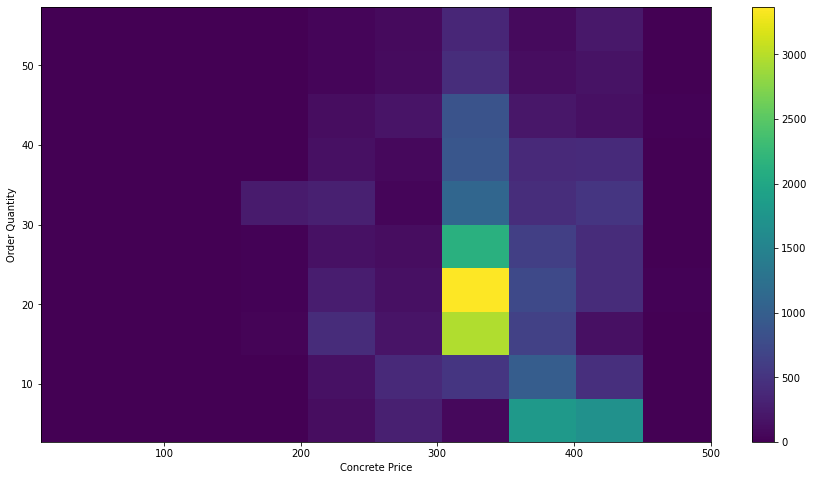

In [52]:
plt.hist2d(data = df_to_plot, x = 'Concrete_Price', y = 'Order_Quantity')
plt.colorbar()
plt.xlabel('Concrete Price')
plt.ylabel('Order Quantity');

### Findining and recommendation 8 : Cement Type of OPC has the most Transcations so i recommend to increase its productivity .

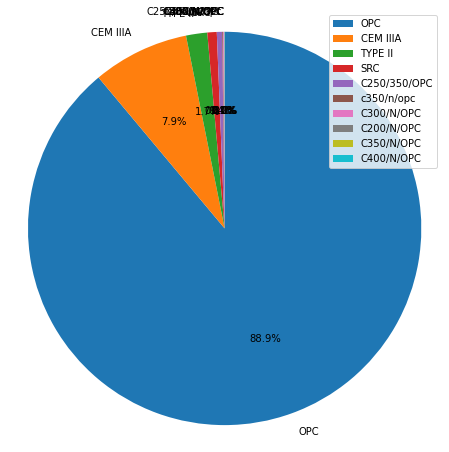

In [53]:
plt.pie(most_cement, labels = most_cement.index, autopct='%1.1f%%', startangle = 90, counterclock = False);

plt.axis('square');
plt.legend();

### Findining and recommendation 9 : Strenght of 250 has the most Transcations so i recommend to increase its productivity .

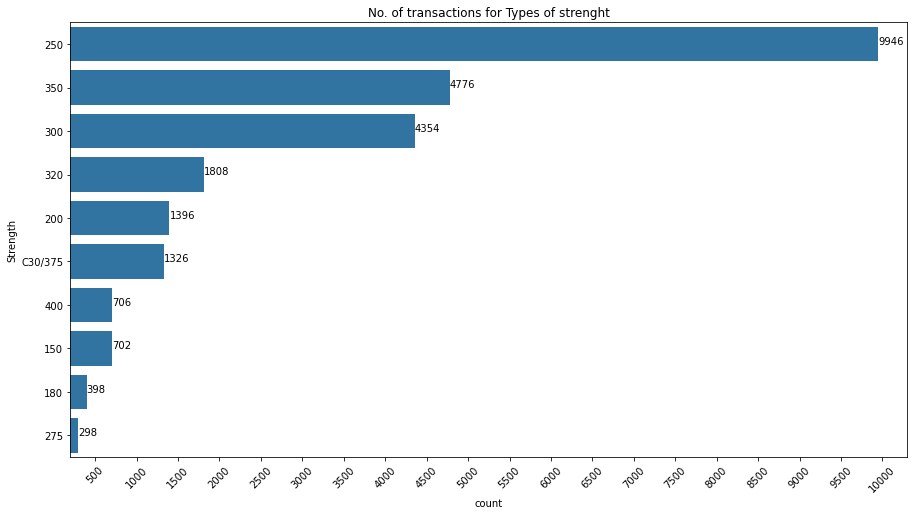

In [54]:
base_color = sb.color_palette()[0]

m_order = most_strength.index
ax = sb.countplot(data=df_to_plot, y='Strength', color=base_color, order=m_order);

for index, value in enumerate(most_strength):
    plt.text(value, index,
             str(value))
            
ticks = np.arange(0,20000,500)
labels = ['{}'.format(v) for v in ticks]    
plt.xticks(ticks, labels,rotation=45);
plt.ylabel('Strength');    
plt.xlim((200,10300));
plt.title('No. of transactions for Types of strenght');

from matplotlib import rcParams
rcParams['figure.figsize'] = 15,8

### Findining and recommendation 10 :Pump of  'مزراب'  has the most Transcations so i recommend to increase its Usage .

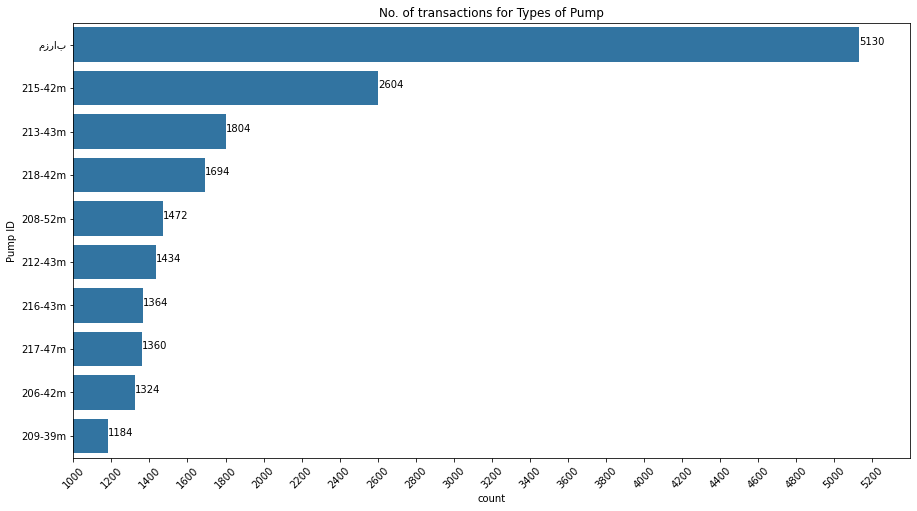

In [55]:
base_color = sb.color_palette()[0]

m_order = most_pump.index
ax = sb.countplot(data=df_to_plot, y='Pump_ID', color=base_color, order=m_order);

for index, value in enumerate(most_pump):
    plt.text(value, index,
             str(value))
            
ticks = np.arange(1000,5400,200)
labels = ['{}'.format(v) for v in ticks]    
plt.xticks(ticks, labels,rotation=45);
plt.ylabel('Pump ID');    
plt.xlim((1000,5400));
plt.title('No. of transactions for Types of Pump');

from matplotlib import rcParams
rcParams['figure.figsize'] = 15,8

### Findining and recommendation 11 :Truck of  'خلاطة عميل'  has the most Transcations so i recommend to increase deals with customers have thier own mixture .

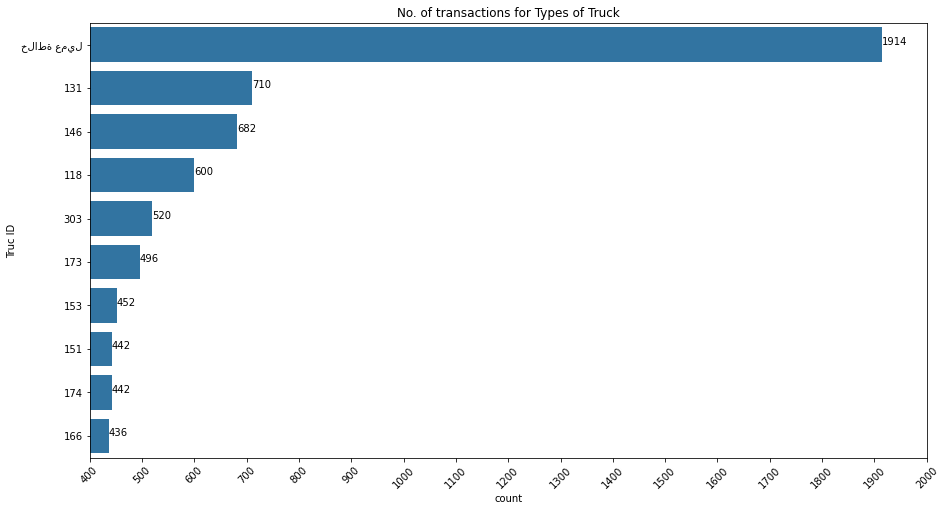

In [56]:
base_color = sb.color_palette()[0]

m_order = most_Truck.index
ax = sb.countplot(data=df_to_plot, y='Truck_ID', color=base_color, order=m_order);

for index, value in enumerate(most_Truck):
    plt.text(value, index,
             str(value))
            
ticks = np.arange(400,2100,100)
labels = ['{}'.format(v) for v in ticks]    
plt.xticks(ticks, labels,rotation=45);
plt.ylabel('Truc ID');    
plt.xlim((400,2000));
plt.title('No. of transactions for Types of Truck');

from matplotlib import rcParams
rcParams['figure.figsize'] = 15,8

### Findining and recommendation 12 :Sales person  'علي ابراهيم'  has the most done deals so i recommend to reward him .

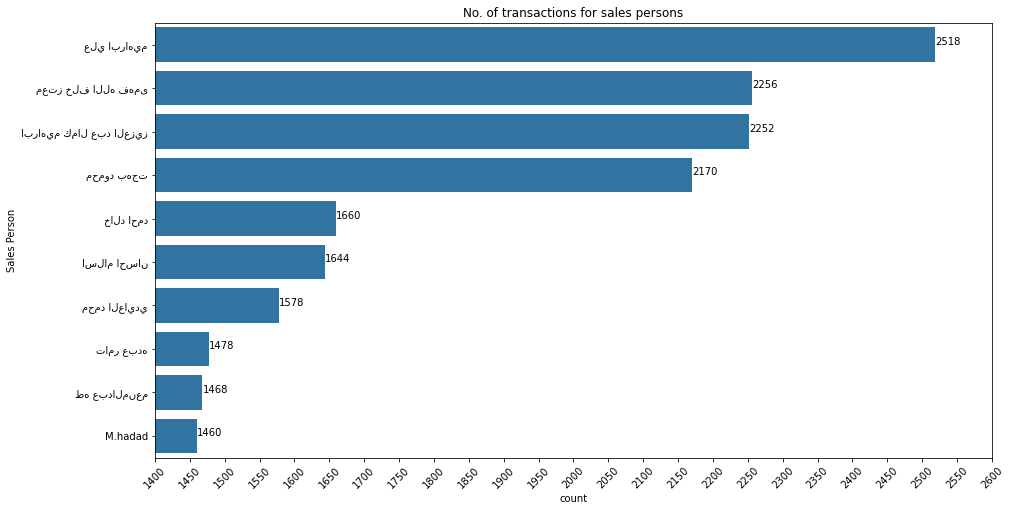

In [57]:
base_color = sb.color_palette()[0]

m_order = most_sales_person.index
ax = sb.countplot(data=df_to_plot, y='Sales_Person', color=base_color, order=m_order);

for index, value in enumerate(most_sales_person):
    plt.text(value, index,
             str(value))
            
ticks = np.arange(1400,2700,50)
labels = ['{}'.format(v) for v in ticks]    
plt.xticks(ticks, labels,rotation=45);
plt.ylabel('Sales Person');    
plt.xlim((1400,2600));
plt.title('No. of transactions for sales persons');

from matplotlib import rcParams
rcParams['figure.figsize'] = 15,8

### Findining and recommendation 13 : Transcations are in specific 10 hours but the hours and days don't have impact in number  of transcations so i recommend the Plants and Pumps be ready to work at any time of the day.

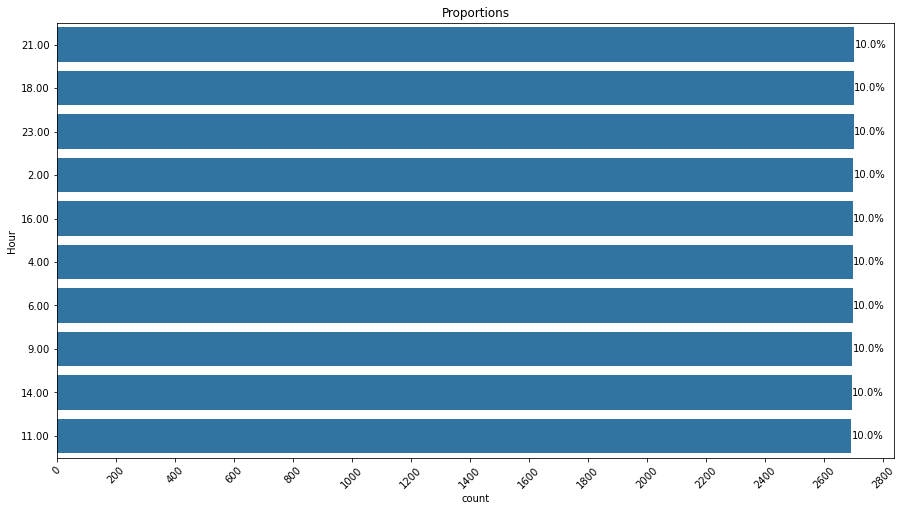

In [58]:
base_color = sb.color_palette()[0]
hr_order = most_hour.index
n_trans = df_to_plot['hour'].value_counts().sum()
max_hr = most_hour.iloc[0]
max_prop = max_hr / n_trans
tick_props = np.arange(0, max_prop, 0.02)
tick_names = ['{:0.2f}'.format(v) for v in tick_props]
sb.countplot(data=df_to_plot, y='hour', color=base_color, order=hr_order);
for i in range (most_hour.shape[0]):
    count = most_hour.iloc[i]
    pct_string = '{:0.1f}%'.format(100*count/n_trans)
    plt.text(count+1, i, pct_string, va='center')
    
ticks = np.arange(0,3000,200)
labels = ['{}'.format(v) for v in ticks]    
plt.xticks(ticks, labels,rotation=45);
plt.ylabel('Hour');
plt.title('Proportions');

from matplotlib import rcParams

### Findining and recommendation 14 : Months at the beggining of the year have most operations so i recommend to increase investment at it

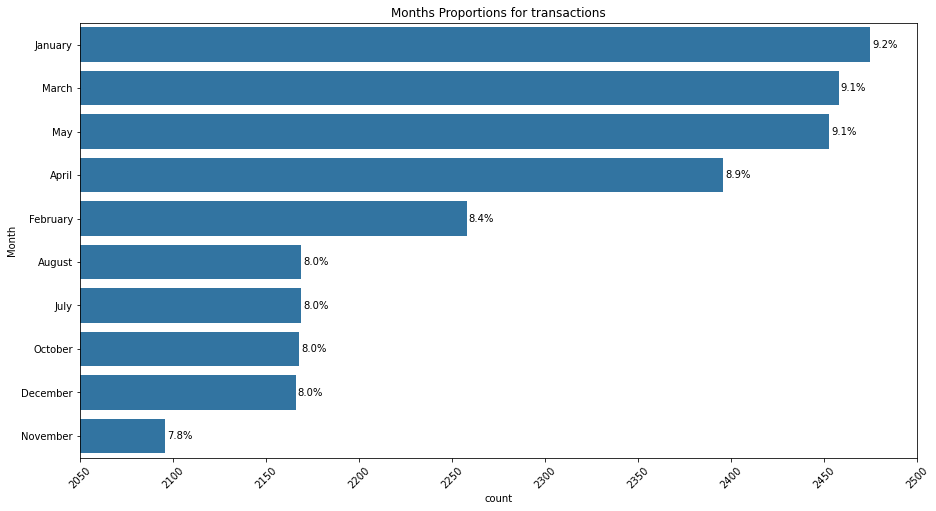

In [59]:
base_color = sb.color_palette()[0]
mo_order = most_Month.index
n_trans = df_to_plot['Month'].value_counts().sum()
max_mo = most_Month.iloc[0]
max_prop = max_mo / n_trans
tick_props = np.arange(0, max_prop, 0.02)
tick_names = ['{:0.2f}'.format(v) for v in tick_props]
sb.countplot(data=df_to_plot, y='Month', color=base_color, order=mo_order);
for i in range (most_Month.shape[0]):
    count = most_Month.iloc[i]
    pct_string = '{:0.1f}%'.format(100*count/n_trans)
    plt.text(count+1, i, pct_string, va='center')
    
ticks = np.arange(2000,2550,50)
labels = ['{}'.format(v) for v in ticks]    
plt.xticks(ticks, labels,rotation=45);
plt.ylabel('Month');
plt.title('Months Proportions for transactions');
plt.xlim((2050,2500));

from matplotlib import rcParams

### Findining and recommendation 15 : Transcations decreased over years from 2010 to 2017 so i recommend to change the marketing strategy

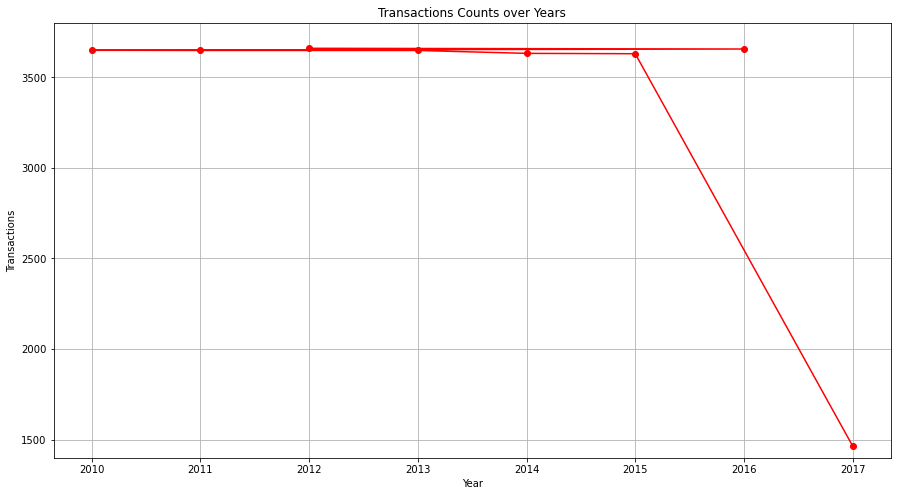

In [60]:
plt.plot(most_year.index, most_year.values, color='red', marker='o')
plt.title('Transactions Counts over Years')
plt.xlabel('Year')
plt.ylabel('Transactions')
plt.grid(True)
plt.ylim((1400,3800));
plt.show()

### Findining and recommendation 16 : CEM IIIA with strenght 300 has the highest average in concrete price 

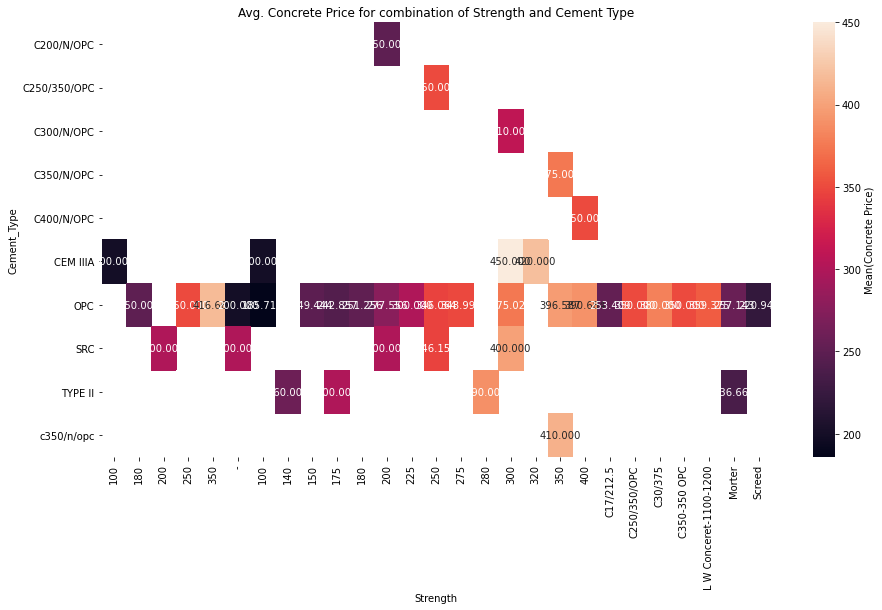

In [61]:
cat_means = df_to_plot.groupby(['Strength', 'Cement_Type']).mean()['Concrete_Price']
cat_means = cat_means.reset_index(name = 'Concrete_Price_avg')
cat_means = cat_means.pivot(index = 'Cement_Type', columns = 'Strength',
                            values = 'Concrete_Price_avg');
sb.heatmap(cat_means, annot = True, fmt = '.3f',
           cbar_kws = {'label' : 'Mean(Concrete Price)'});
plt.title('Avg. Concrete Price for combination of Strength and Cement Type');

<a id='conclusions'></a>

## Conclusions

#### After loading data from XLSX file of Data Analyst Test Dataset of UNIMIX, i started assessing data visually and programatically to be cleaned and I found some limitations i need to handle it before starting analysis , for instance

- drop operations with NAN values for Work_Order_Number, Customer_Name, Strength, and Cement_Type.
- convert Work_Order_Number to object.
- convert Transaction_Number to object.
- convert Cement_Type to category.
- convert Strength to category.
- convertPump_ID to object.
- convert Truck_ID to object.

#### After cleaning the data i started to pose questions and analyze data , here the most important findings afte explanatory and my recommendations :

- Mokattam is most plant in transcations so i recommend to increase workers and equipements there in cover the need.
- ssuit is the most plant in price average and N_Capital has a huge gap in price so recommend to make studies to know the reason of price gap of N_Capital.
- Visualize the top 10 customers with UNIMIX so i recommend to make for them special offers.
- Visualize the less 10 customers have deals with UNIMIX so i recommend to Know their feedback about our service and try to return the relationship again.
- Order Quantity from 7 : 8 has the most transcations.
- Most Transcation have done with Price of 350 so i encourage to make deals around this price.
- Concrete price from 300 to 350 have most order quantity.
- Cement Type of OPC has the most Transcations so i recommend to increase its productivity.
- Strenght of 250 has the most Transcations so i recommend to increase its productivity.
- Pump of  'مزراب'  has the most Transcations so i recommend to increase its Usage.
- Truck of  'خلاطة عميل'  has the most Transcations so i recommend to increase deals with customers have thier own mixture.
- Sales person  'علي ابراهيم'  has the most done deals so i recommend to reward him.
- Transcations are in specific 10 hours but the hours and days don't have impact in number  of transcations so i recommend the Plants and Pumps be ready to work at any time of the day.
- Months at the beggining of the year have most operations so i recommend to increase investment at it.
- Transcations decreased over years from 2010 to 2017 so i recommend to change the marketing strategy.
- CEM IIIA with strenght 300 has the highest average in concrete price .